<a href="https://colab.research.google.com/github/yursil-shakeel/Gym_Website/blob/main/DigitsRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

#Exploring the Dataset

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

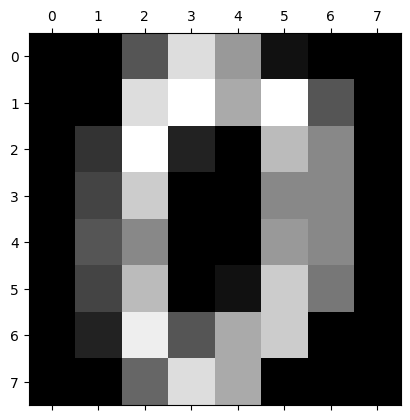

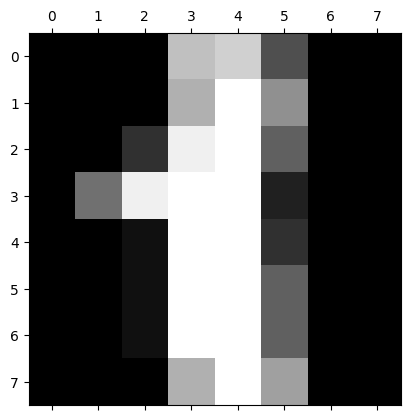

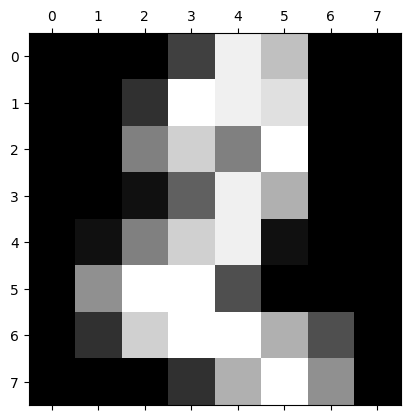

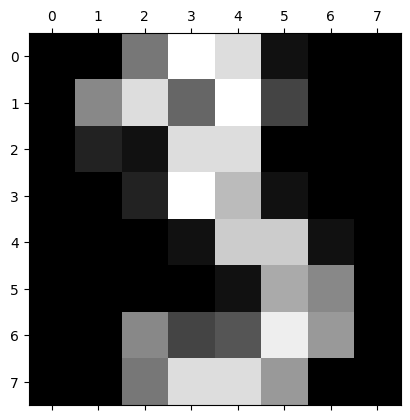

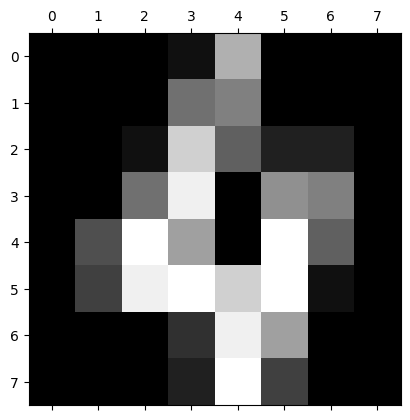

In [ ]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [ ]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

#Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [ ]:
len(X_train)

1437

In [ ]:
len(X_test)

360

#Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Checking the performance of model

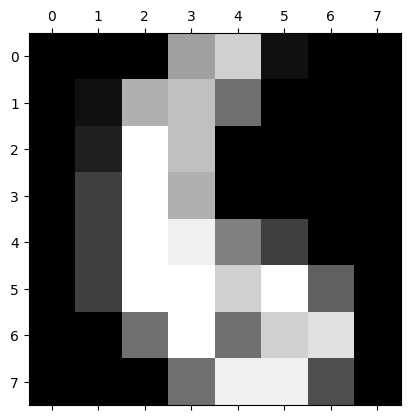

In [ ]:
plt.matshow(digits.images[58])

In [ ]:
model.predict([digits.data[58]])

array([6])

In [ ]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

#Checking the accuracy

In [ ]:
accuracy = model.score(X_test, y_test)
print("The accuracy of the model is: ",accuracy*100)

The accuracy of the model is:  96.66666666666667


#Analyzing Misclassifications

In [ ]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 27,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 39,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 31,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'Truth')

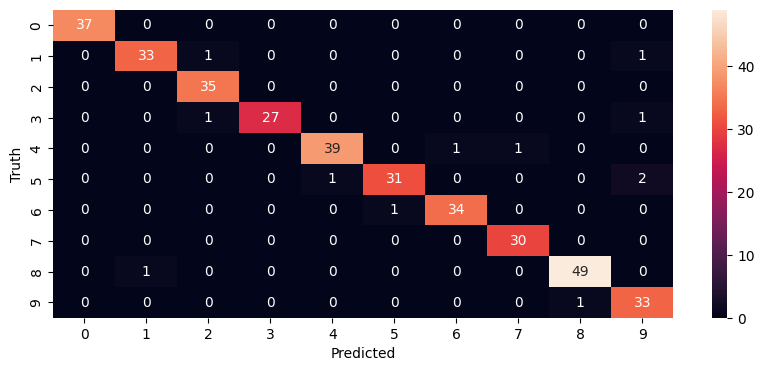

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,4))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")